# Importing Required Libraries 

In [243]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt
%matplotlib inline

# Setting up the 1 year Time period


In [244]:
#few ticker symbols can be found in F&O.txt file
ticker_symbol='AMZN' #ticker symbol E.G: 'AMZN' is ticker symbol for amazon
startDate='2021-01-01'
endDate='2022-01-01'

# Data Representation


In [245]:
Data=yfinance.Ticker(ticker_symbol)
Data=Data.history(start=startDate,end=endDate)

Data.to_csv('new.xlsx')
Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-31,3275.000000,3282.919922,3241.199951,3256.929932,2957200,0,0
2021-01-04,3270.000000,3272.000000,3144.020020,3186.629883,4411400,0,0
2021-01-05,3166.010010,3223.379883,3165.060059,3218.510010,2655500,0,0
2021-01-06,3146.479980,3197.510010,3131.159912,3138.379883,4394800,0,0
2021-01-07,3157.000000,3208.540039,3155.000000,3162.159912,3514500,0,0
...,...,...,...,...,...,...,...
2021-12-27,3420.739990,3458.860107,3384.310059,3393.389893,2934400,0,0
2021-12-28,3403.649902,3443.520020,3382.709961,3413.219971,2731900,0,0
2021-12-29,3416.800049,3424.239990,3372.010010,3384.020020,1787700,0,0


#  Displaying and plotting dates on which the Candle size is atleast 80%


2021-02-03 --> 89.71134598758461
2021-02-19 --> 89.26504629629629
2021-03-24 --> 85.1115456577101
2021-04-14 --> 90.925567152053
2021-04-22 --> 87.7061705015092
2021-05-03 --> 86.21327979877404
2021-05-10 --> 98.74201948924731
2021-05-27 --> 85.38863524732065
2021-06-25 --> 88.53329278155263
2021-07-15 --> 84.58648834693678
2021-10-04 --> 86.3792864051737
2021-10-08 --> 85.40445228124311
2021-10-22 --> 86.71597046727119
2021-12-01 --> 85.62750529440176
2021-12-13 --> 81.90232714897535
2021-12-31 --> 80.20771383592793


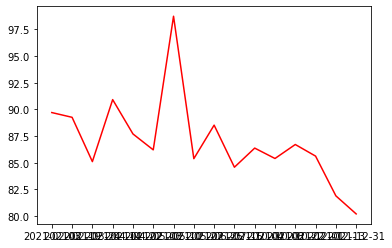

In [246]:
new_data=pd.read_csv('new.xlsx')
set_date_data1=[]
set_size_data1=[]

for i in range(len(new_data['Date'])):
    
    size=((new_data['Open'][i]-new_data['Close'][i])/(new_data['High'][i]-new_data['Low'][i]))*100
    if size>=80.0 and size<=100:
        set_date_data1.append(new_data['Date'][i])
        set_size_data1.append(size)
        print(new_data['Date'][i],"-->",size)
plt.plot(new_date,new_size,color='red')
        


# Calculating 20 day SMA 

In [247]:
SMA_20=pd.DataFrame()#creating empty data frame
SMA_20['Close']=Data['Close'].rolling(window=20).mean()
SMA_20['Close']=SMA_20['Close'].fillna(0)

SMA_20

,Close
Date,
2020-12-31,0.000000
2021-01-04,0.000000
2021-01-05,0.000000
2021-01-06,0.000000
2021-01-07,0.000000
...,...
2021-12-27,3437.183032
2021-12-28,3429.765527
2021-12-29,3423.613025


# Calculating 50 day SMA  

In [248]:
SMA_50=pd.DataFrame()#creating empty data frame
SMA_50['Close']=Data['Close'].rolling(window=50).mean()
SMA_50['Close']=SMA_50['Close'].fillna(0)
SMA_50

,Close
Date,
2020-12-31,0.000000
2021-01-04,0.000000
2021-01-05,0.000000
2021-01-06,0.000000
2021-01-07,0.000000
...,...
2021-12-27,3458.769419
2021-12-28,3458.853418
2021-12-29,3457.599019


# Converting SMA data to CSV files 

In [249]:

SMA_50.to_csv('SMA50.csv')
SMA_20.to_csv('SMA20.csv')


#  Displaying dates on which stock price is greater than SMA20 and SMA50 and SMA20>SMA50   ---------->(2)

In [250]:
set_date_data2=[]
set_closep_data2=[]
for i in range(len(new_data['Date'])):

    if  new_data['Close'][i]> SMA_50['Close'][i] and new_data['Close'][i]> SMA_20['Close'][i] and SMA_20['Close'][i]> SMA_50['Close'][i] :
        set_date_data2.append(new_data['Date'][i])
        set_closep_data2.append(new_data['Close'][i])
        print(new_data['Date'][i],"-->",new_data['Close'][i])

2021-01-29 --> 3206.199951171875
2021-02-01 --> 3342.8798828125
2021-02-02 --> 3380.0
2021-02-03 --> 3312.530029296875
2021-02-04 --> 3331.0
2021-02-05 --> 3352.14990234375
2021-02-08 --> 3322.93994140625
2021-02-09 --> 3305.0
2021-02-10 --> 3286.580078125
2021-02-17 --> 3308.639892578125
2021-02-18 --> 3328.22998046875
2021-04-14 --> 3333.0
2021-04-15 --> 3379.090087890625
2021-04-16 --> 3399.43994140625
2021-04-19 --> 3372.010009765625
2021-04-20 --> 3334.68994140625
2021-04-21 --> 3362.02001953125
2021-04-22 --> 3309.0400390625
2021-04-23 --> 3340.8798828125
2021-04-26 --> 3409.0
2021-04-27 --> 3417.429931640625
2021-04-28 --> 3458.5
2021-04-29 --> 3471.31005859375
2021-04-30 --> 3467.419921875
2021-05-03 --> 3386.489990234375
2021-06-22 --> 3505.43994140625
2021-06-23 --> 3503.820068359375
2021-06-24 --> 3449.080078125
2021-06-25 --> 3401.4599609375
2021-06-28 --> 3443.889892578125
2021-06-29 --> 3448.139892578125
2021-06-30 --> 3440.159912109375
2021-07-01 --> 3432.969970703125
20

In [251]:
final_data1=pd.DataFrame()
final_data1['Date']=set_date_data1
final_data1['Close']=set_size_data1
final_data1

,Date,Close
0,2021-02-03,89.711346
1,2021-02-19,89.265046
2,2021-03-24,85.111546
3,2021-04-14,90.925567
4,2021-04-22,87.706171
5,2021-05-03,86.213280
6,2021-05-10,98.742019
7,2021-05-27,85.388635
8,2021-06-25,88.533293
9,2021-07-15,84.586488


In [252]:
final_data2=pd.DataFrame()
final_data2['Date']=set_date_data2
final_data2['Close']=set_closep_data2
final_data2

,Date,Close
0,2021-01-29,3206.199951
1,2021-02-01,3342.879883
2,2021-02-02,3380.000000
3,2021-02-03,3312.530029
4,2021-02-04,3331.000000
...,...,...
58,2021-11-19,3676.570068
59,2021-11-22,3572.570068
60,2021-11-23,3580.040039
61,2021-11-24,3580.409912



# Displaying dates in which the size of the candle is atleast 80% and the stock price is above 20 Day SMA and 50 Day SMA and the 20 day SMA is above 50 day SMA.

In [253]:
for i in range(len(final_data1['Date'])):
    for j in range(len(final_data2['Date'])):
        if final_data1['Date'][i]==final_data2['Date'][j]:#taking the common dates for required result
            print(final_data1['Date'][i])

2021-02-03
2021-04-14
2021-04-22
2021-05-03
2021-06-25
2021-07-15
